# Largest product in a grid
---
<div class="problem_content" role="problem">
<p>In the 20×20 grid below, four numbers along a diagonal line have been marked in red.</p>
<p style="font-family:'courier new';text-align:center;font-size:10pt;">
08 02 22 97 38 15 00 40 00 75 04 05 07 78 52 12 50 77 91 08<br>
49 49 99 40 17 81 18 57 60 87 17 40 98 43 69 48 04 56 62 00<br/>
81 49 31 73 55 79 14 29 93 71 40 67 53 88 30 03 49 13 36 65<br/>
52 70 95 23 04 60 11 42 69 24 68 56 01 32 56 71 37 02 36 91<br/>
22 31 16 71 51 67 63 89 41 92 36 54 22 40 40 28 66 33 13 80<br/>
24 47 32 60 99 03 45 02 44 75 33 53 78 36 84 20 35 17 12 50<br/>
32 98 81 28 64 23 67 10 <span style="color:#ff0000;"><b>26</b></span> 38 40 67 59 54 70 66 18 38 64 70<br/>
67 26 20 68 02 62 12 20 95 <span style="color:#ff0000;"><b>63</b></span> 94 39 63 08 40 91 66 49 94 21<br/>
24 55 58 05 66 73 99 26 97 17 <span style="color:#ff0000;"><b>78</b></span> 78 96 83 14 88 34 89 63 72<br/>
21 36 23 09 75 00 76 44 20 45 35 <span style="color:#ff0000;"><b>14</b></span> 00 61 33 97 34 31 33 95<br/>
78 17 53 28 22 75 31 67 15 94 03 80 04 62 16 14 09 53 56 92<br/>
16 39 05 42 96 35 31 47 55 58 88 24 00 17 54 24 36 29 85 57<br/>
86 56 00 48 35 71 89 07 05 44 44 37 44 60 21 58 51 54 17 58<br/>
19 80 81 68 05 94 47 69 28 73 92 13 86 52 17 77 04 89 55 40<br/>
04 52 08 83 97 35 99 16 07 97 57 32 16 26 26 79 33 27 98 66<br/>
88 36 68 87 57 62 20 72 03 46 33 67 46 55 12 32 63 93 53 69<br/>
04 42 16 73 38 25 39 11 24 94 72 18 08 46 29 32 40 62 76 36<br/>
20 69 36 41 72 30 23 88 34 62 99 69 82 67 59 85 74 04 36 16<br/>
20 73 35 29 78 31 90 01 74 31 49 71 48 86 81 16 23 57 05 54<br/>
01 70 54 71 83 51 54 69 16 92 33 48 61 43 52 01 89 19 67 48<br/></br></p>
<p>The product of these numbers is 26 × 63 × 78 × 14 = 1788696.</p>
<p>What is the greatest product of four adjacent numbers in the same direction (up, down, left, right, or diagonally) in the 20×20 grid?</p>
</div>


# The Explanation
---

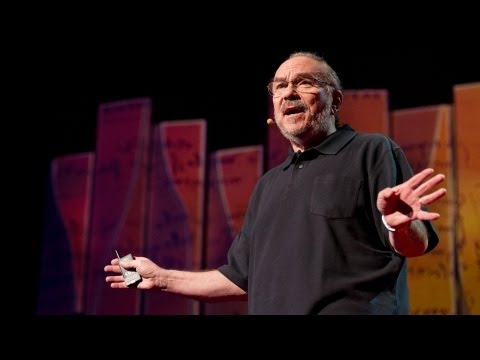

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('YX_OxBfsvbk', width=800, height=400)

# The Code
---


In [5]:
def get_horizontal(grid, index, size):
    row, column = index
    h_mul = 0
        
    #   : لسنا بحاجة إلى عبارة استثناء لأننا لن نتجاوز أبدًا التالى 
    # 1) موقع الصف          
    # 2) موقع العمود
    
    # أيضًا إذا كانت النهاية تتعدى النهاية (عدد العناصر في الصف) هذا لن يسبب خطأ

    horizontal = grid[row][column: column + size]
    if len(horizontal) == size and all(horizontal):
        h_mul = 1
        for n in horizontal:
            h_mul *= n

    return h_mul

def get_vertical(grid, index, size):
    row, column = index
    vertical =[]
    # ليس من الضرورى ان نجعله 0 لان الدالة سترجع صفر اذا حصل اى خطأ
    v_mul = 1
    
    # هنا نحن بحاجة إلى عبارة استثناء لأننا يمكن ان نتجاوز موقع الصفوف 
    # وبالتالى هسنقوم بتحديد صف لا يوجد اساسا   
    try:
        for i in range(size):
            element = grid[row + i][column]
            # حاصل الضرب سيصبح صفر
            if element == 0:
                return 0
            vertical.append(element)
    
    except:
        return 0
    
    # :لا نحتاج الى جملة الشرط بالاسفل لأن
        # سوف يحدث خطأ فى البرنامج اذا كانت عدد عناصر المجموعة اقل من 4 عناصر  (1 
        # 2) سوف ترجع الدالة صفرا اذا كان احد العناصر صفرا

    #     if len(horizontal) == size and all(horizontal):
    for n in vertical:
        v_mul *= n
    
    return v_mul

def get_diagonal(grid, index, size):
    row, column = index
    
    m_diagonal = [] # القطر الرئيسى
    s_diagonal = [] # القطر الثانوى
    
    for i in range(size):
        # فحص القطر الرئيسى
        try:
            m_diagonal.append(grid[row + i][column + i])

        except:
            m_diagonal=[0]
        
        # فحص القطر الثانوى
        try:
            s_diagonal.append(grid[row + i][column - i])

        except:
            s_diagonal=[0]

    m_mul, s_mul  = 0, 0 # حاصل ضرب العناصر
    
    # ضرب عناصر القطر الرئيسى
    if len(m_diagonal) == size and all(m_diagonal):
        m_mul = 1
        for m in m_diagonal:
            m_mul *= m
               
    # ضرب عناصر القطر الثانوى
    if len(s_diagonal) == size and all(s_diagonal):
        s_mul = 1
        for s in s_diagonal:
            s_mul *= s
        
    return max(m_mul,s_mul)

    
def max_of(grid, index, size=4):
    '''
    index : زوج مرتب لكلا من (موقع الصف , موقع العمود)
    size  : كمية الاعداد المتجاورة
    '''
    h_mul = get_horizontal(grid, index, size)
    v_mul = get_vertical(grid, index, size)
    d_mul = get_diagonal(grid, index, size)
    
    return max(h_mul,v_mul,d_mul)

In [6]:
grid = '''
08 02 22 97 38 15 00 40 00 75 04 05 07 78 52 12 50 77 91 08
49 49 99 40 17 81 18 57 60 87 17 40 98 43 69 48 04 56 62 00
81 49 31 73 55 79 14 29 93 71 40 67 53 88 30 03 49 13 36 65
52 70 95 23 04 60 11 42 69 24 68 56 01 32 56 71 37 02 36 91
22 31 16 71 51 67 63 89 41 92 36 54 22 40 40 28 66 33 13 80
24 47 32 60 99 03 45 02 44 75 33 53 78 36 84 20 35 17 12 50
32 98 81 28 64 23 67 10 26 38 40 67 59 54 70 66 18 38 64 70
67 26 20 68 02 62 12 20 95 63 94 39 63 08 40 91 66 49 94 21
24 55 58 05 66 73 99 26 97 17 78 78 96 83 14 88 34 89 63 72
21 36 23 09 75 00 76 44 20 45 35 14 00 61 33 97 34 31 33 95
78 17 53 28 22 75 31 67 15 94 03 80 04 62 16 14 09 53 56 92
16 39 05 42 96 35 31 47 55 58 88 24 00 17 54 24 36 29 85 57
86 56 00 48 35 71 89 07 05 44 44 37 44 60 21 58 51 54 17 58
19 80 81 68 05 94 47 69 28 73 92 13 86 52 17 77 04 89 55 40
04 52 08 83 97 35 99 16 07 97 57 32 16 26 26 79 33 27 98 66
88 36 68 87 57 62 20 72 03 46 33 67 46 55 12 32 63 93 53 69
04 42 16 73 38 25 39 11 24 94 72 18 08 46 29 32 40 62 76 36
20 69 36 41 72 30 23 88 34 62 99 69 82 67 59 85 74 04 36 16
20 73 35 29 78 31 90 01 74 31 49 71 48 86 81 16 23 57 05 54
01 70 54 71 83 51 54 69 16 92 33 48 61 43 52 01 89 19 67 48
'''

int_grid = []
for line in grid.strip().split('\n'):
    numbers = [int(n) for n in line.split()]
    int_grid.append(numbers)

SIZE = 4
dim_grid = len(int_grid)   
max_mul = 0
for row in range(dim_grid):
    for column in range(dim_grid):
        mul = max_of(int_grid, (row,column), SIZE)
        if mul > max_mul:
            max_mul = mul
            

print(max_mul)
    

70600674
